In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import create_engine, func

In [55]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)



In [7]:
# We can view all of the classes that automap found
for name in Base.classes:
    print(name)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [10]:
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)
s = Session()

# Exploratory Climate Analysis

2017-08-23


<Figure size 720x576 with 0 Axes>

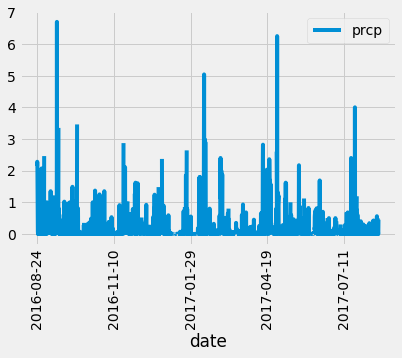

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
print(s.query(Measurement.date).order_by(Measurement.date.desc()).first()[0])
# Perform a query to retrieve the data and precipitation scores
query = s.query(Measurement.date,Measurement.prcp).filter(Measurement.date > "2016-08-23")
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query)
df.set_index(keys='date',inplace=True)
# Sort the dataframe by date
df.sort_values(by="date",inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
df.plot()
plt.xticks(rotation=90)
plt.show()


In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis
* Design a query to calculate the total number of stations.

In [78]:
# Design a query to show how many stations are available in this dataset?
df = pd.DataFrame(s.query(Measurement.station).filter(Measurement.date > "2016-08-23"))
f"Unique stations in dataset: {df.station.unique().shape[0]}"

'Unique stations in dataset: 7'

* Design a query to find the most active stations.
    * List the stations and observation counts in descending order.
    * Which station has the highest number of observations?
    * Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.

In [111]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
s.query(Measurement.station, func.count(Measurement.date)).filter(Measurement.date > "2016-08-23").group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()

[('USC00519397', 360),
 ('USC00519281', 351),
 ('USC00516128', 348),
 ('USC00513117', 342),
 ('USC00519523', 336),
 ('USC00514830', 304),
 ('USC00517948', 182)]

In [118]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = s.query(func.min(Measurement.tobs).label('min temp')).filter(Measurement.station == "USC00519397").one()[0]
print(f"Lowest temperature: {lowest_temp} F")
highest_temp = s.query(func.max(Measurement.tobs).label('max temp')).filter(Measurement.station == "USC00519397").one()[0]
print(f"Highest temperature: {highest_temp} F")
  
average_temp = s.query(func.avg(Measurement.tobs).label('average temp')).filter(Measurement.station == "USC00519397").first()[0]
print(f"Average temperature: {average_temp:.2f} F")

Lowest temperature: 56.0 F
Highest temperature: 87.0 F
Average temperature: 74.55 F


In [117]:
s.query(func.min(Measurement.tobs).label('min temp')).filter(Measurement.station == "USC00519397").one()[0]

56.0

Text(0, 0.5, 'Count of Measurements')

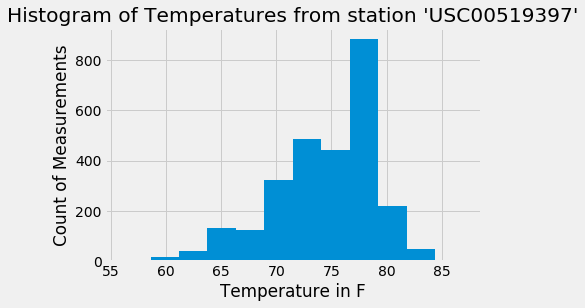

In [105]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(s.query(Measurement.tobs).filter(Measurement.station == "USC00519397"))
df.hist(bins=12)
plt.title("Histogram of Temperatures from station 'USC00519397'")
plt.xlabel("Temperature in F")
plt.ylabel("Count of Measurements")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
